In [137]:
# import statements
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function Definitions

In [138]:
# define model
## note: p_EI could be included but it's just 1.
def SEIHRD_model(y, t, beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N):
    S, E, I, H, R, D = y
    dSdt = -S*I*beta(t)/N
    dEdt = S*I*beta(t)/N - E*r_EI(t)
    dIdt = E*r_EI(t) - I*r_IR(t)*p_IR(t) - I*r_IH(t)*p_IH(t)
    dHdt = I*r_IH(t)*p_IH(t) - H*r_HR(t)*p_HR(t) - H*r_HD(t)*p_HD(t)
    dRdt = I*r_IR(t)*p_IR(t) + H*r_HR(t)*p_HR(t)
    dDdt = H*r_HD(t)*p_HD(t)
    return dSdt, dEdt, dIdt, dHdt, dRdt, dDdt

#  plot model
def plotSEIHRD(t, S, E, I, H, R, D):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'r', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'o', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, H, 'g', alpha=0.7, linewidth=2, label='Hospitalized')
    ax.plot(t, R, 'b', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'p', alpha=0.7, linewidth=2, label='Dead')


    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    # ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();

# Example Simulation and Plot

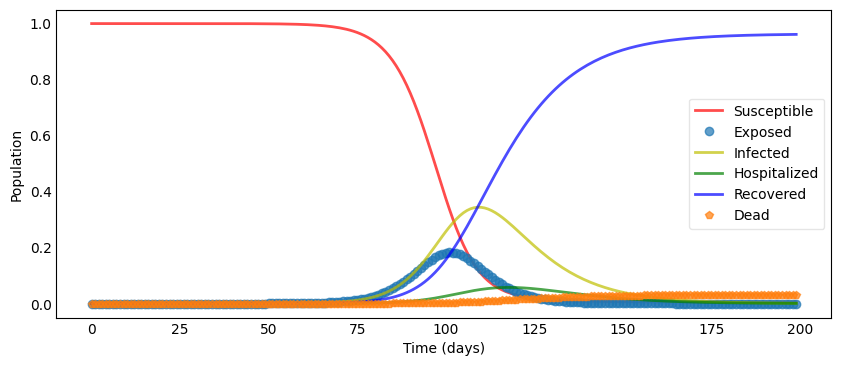

In [178]:
# set parameter values
def beta(t): return np.piecewise(t, [t>=0], [0.4])
def r_EI(t): return np.piecewise(t, [t>=0], [0.2])
def p_EI(t): return np.piecewise(t, [t>=0], [1]) ## not sure if this is necessary?? not in the model.
def r_IR(t): return np.piecewise(t, [t>=0], [0.07])
def p_IR(t): return np.piecewise(t, [t>=0], [0.8])
def r_IH(t): return np.piecewise(t, [t>=0], [0.1])
def p_IH(t): return np.piecewise(t, [t>=0], [0.2])
def r_HR(t): return np.piecewise(t, [t>=0], [0.1])
def p_HR(t): return np.piecewise(t, [t>=0], [0.88])
def r_HD(t): return np.piecewise(t, [t>=0], [0.1])
def p_HD(t): return np.piecewise(t, [t>=0], [0.12])
N = 19340000

# set initial conditions
N0 = N
I0 = 4 # fill in with data
D0 = 0 # fill in with data
H0 = 0 # fill in with data
E0 = I0/4 
R0 = 0 # fill in with data
S0 = N - E0 - I0 - R0 - H0 - D0
y0 = S0, E0, I0, H0, R0, D0 # Initial conditions vector

# set simulation parameters
## 
dt = 1
tstart = 0
tend = 200
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIHRD_model, y0, tvect, args=(beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N))
S, E, I, H, R, D = sim.T

# plot results
# plotSEIHRD(tvect, S, E, I, H, R, D) ## original
plotSEIHRD(tvect, S/N, E/N, I/N, H/N, R/N, D/N) ## fractions of population

In [179]:
print(max(S))
print(max(E))
print(max(I))
print(max(H))
print(max(R))
print(max(D))

19339995.0
3530754.7126296493
6654604.779348395
1116621.628291033
18593276.705101635
604942.3441093425


In [180]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.DataFrame(list(zip(S, E, I, H, R, D, N_model)), columns =['S', 'E', 'I', 'H', 'R', 'D', 'N_model'])
df.head(10)

,S,E,I,H,R,D,N_model
0,1.934000e+07,1.000000,4.000000,0.000000,0.000000,0.000000,19340000.0
1,1.933999e+07,2.266422,4.027220,0.075996,0.226988,0.000463,19340000.0
2,1.933999e+07,3.356433,4.277154,0.147515,0.468434,0.001806,19340000.0
3,1.933999e+07,4.374638,4.710317,0.218803,0.735394,0.004003,19340000.0
4,1.933999e+07,5.396324,5.307177,0.293153,1.037636,0.007070,19340000.0
5,1.933999e+07,6.478818,6.062233,0.373318,1.384510,0.011062,19340000.0
6,1.933998e+07,7.669084,6.980317,0.461787,1.785592,0.016063,19340000.0
7,1.933998e+07,9.008894,8.074379,0.560987,2.251176,0.022187,19340000.0
8,1.933998e+07,10.538457,9.364261,0.673428,2.792695,0.029579,19340000.0
9,1.933997e+07,12.299089,10.876172,0.801819,3.423104,0.038413,19340000.0


## Change beta to be beta*(1-c_m*epsilon_m)

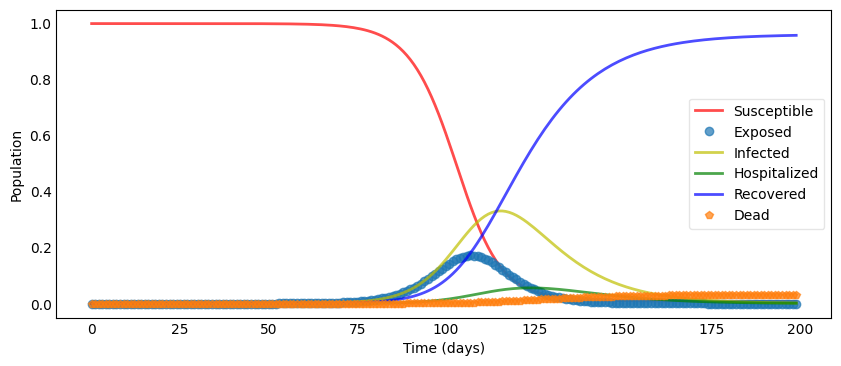

In [181]:
# set parameter values
def epsilon_m(t): return np.piecewise(t, [t>=0], [0.25]) ## placeholder values for epsilon_m and c_m.  Will run with c_m=0.4, 0.6, 0.8
def c_m(t): return np.piecewise(t, [t>=0], [0.25]) ## placeholder values for epsilon_m and c_m.  Will run with c_m=0.4, 0.6, 0.8
def beta(t): return np.piecewise(t, [t>=0], [0.4*(1-epsilon_m(t)*c_m(t))]) ## placeholder values for epsilon_m and c_m.  Will run with c_m=0.4, 0.6, 0.8
def r_EI(t): return np.piecewise(t, [t>=0], [0.2])
def p_EI(t): return np.piecewise(t, [t>=0], [1]) ## not sure if this is necessary?? not in the model.
def r_IR(t): return np.piecewise(t, [t>=0], [0.07])
def p_IR(t): return np.piecewise(t, [t>=0], [0.8])
def r_IH(t): return np.piecewise(t, [t>=0], [0.1])
def p_IH(t): return np.piecewise(t, [t>=0], [0.2])
def r_HR(t): return np.piecewise(t, [t>=0], [0.1])
def p_HR(t): return np.piecewise(t, [t>=0], [0.88])
def r_HD(t): return np.piecewise(t, [t>=0], [0.1])
def p_HD(t): return np.piecewise(t, [t>=0], [0.12])
N = 19340000


# set initial conditions
N0 = N
I0 = 4 # fill in with data
D0 = 0 # fill in with data
R0 = 0 # fill in with data
H0 = I0/10 # fill in with data
E0 = I0/4 
S0 = N - E0 - I0 - R0 - H0 - D0
y0 = S0, E0, I0, H0, R0, D0 # Initial conditions vector

# set simulation parameters
## 
dt = 1
tstart = 0
tend = 200
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIHRD_model, y0, tvect, args=(beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N))
S, E, I, H, R, D = sim.T

# plot results
# plotSEIHRD(tvect, S, E, I, H, R, D) ## original
plotSEIHRD(tvect, S/N, E/N, I/N, H/N, R/N, D/N) ## fractions of pop.

In [182]:
df = pd.DataFrame(list(zip(S/N, E/N, I/N, H/N, R/N, D/N)), columns =['S', 'E', 'I', 'H', 'R', 'D'])
df.head(30)

,S,E,I,H,R,D
0,1.000000,5.170631e-08,2.068252e-07,2.068252e-08,0.000000e+00,0.000000e+00
1,1.000000,1.124524e-07,2.077592e-07,2.264066e-08,1.345963e-08,2.601147e-10
2,1.000000,1.644532e-07,2.193789e-07,2.453766e-08,2.745069e-08,5.431410e-10
3,0.999999,2.125487e-07,2.397174e-07,2.656191e-08,4.251465e-08,8.495335e-10
4,0.999999,2.602067e-07,2.677399e-07,2.885603e-08,5.912491e-08,1.181710e-09
5,0.999999,3.100358e-07,3.030648e-07,3.153601e-08,7.772753e-08,1.543623e-09
6,0.999999,3.641291e-07,3.457862e-07,3.470437e-08,9.877068e-08,1.940528e-09
7,0.999999,4.242990e-07,3.963636e-07,3.845934e-08,1.227272e-07,2.378874e-09
8,0.999999,4.922399e-07,4.555585e-07,4.290153e-08,1.501131e-07,2.866300e-09
9,0.999999,5.696456e-07,5.244012e-07,4.813913e-08,1.815037e-07,3.411691e-09


In [163]:
print(max(S))
print(max(E))
print(max(I))
print(max(H))
print(max(R))
print(max(D))

19339994.6
3325878.373173154
6396672.150177323
1084489.1684596052
18528494.029624797
601999.1525129337


### Time-varying beta 

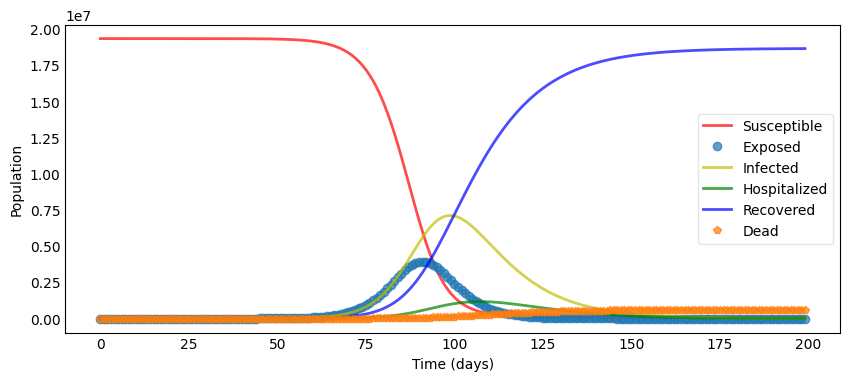

In [176]:
# set parameter values
def beta_c(t): return np.piecewise(t, [t>=0], [0.4])
def beta_s(t): return np.piecewise(t, [t>=0], [1.0])
def k(t): return np.piecewise(t, [t>=0], [5.0])
def kappa(t): return np.piecewise(t, [t>=0], [0.45454545454545453])
def t0(t): return np.piecewise(t, [t>=0], [120])
def m(t): return beta_c(t) + (beta_s(t) - beta_c(t))/(1+np.exp(-k(t0(t)-t)))
# def m(t): return np.piecewise(t, [t>=0], [0.1])
def beta(t): return np.piecewise(t, [t>=0], [kappa(t)*m(t)])
def r_EI(t): return np.piecewise(t, [t>=0], [0.2])
def p_EI(t): return np.piecewise(t, [t>=0], [1]) ## not sure if this is necessary?? not in the model.
def r_IR(t): return np.piecewise(t, [t>=0], [0.07])
def p_IR(t): return np.piecewise(t, [t>=0], [0.8])
def r_IH(t): return np.piecewise(t, [t>=0], [0.1])
def p_IH(t): return np.piecewise(t, [t>=0], [0.2])
def r_HR(t): return np.piecewise(t, [t>=0], [0.1])
def p_HR(t): return np.piecewise(t, [t>=0], [0.88])
def r_HD(t): return np.piecewise(t, [t>=0], [0.1])
def p_HD(t): return np.piecewise(t, [t>=0], [0.12])
N = 19340000


# set initial conditions
N0 = N
I0 = 4 # fill in with data
D0 = 0 # fill in with data
R0 = 0 # fill in with data
H0 = I0/10 # fill in with data
E0 = I0/4 
S0 = N - E0 - I0 - R0 - H0 - D0
y0 = S0, E0, I0, H0, R0, D0 # Initial conditions vector

# set simulation parameters
## 
dt = 1
tstart = 0
tend = 200
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIHRD_model, y0, tvect, args=(beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N))
S, E, I, H, R, D = sim.T

# plot results
plotSEIHRD(tvect, S, E, I, H, R, D)

In [177]:
df = pd.DataFrame(list(zip(S, E, I, H, R, D)), columns =['S', 'E', 'I', 'H', 'R', 'D'])
print(max(S))
print(max(E))
print(max(I))
print(max(H))
print(max(R))
print(max(D))
print('')
print(np.argmax(S))
print(np.argmax(E))
print(np.argmax(I))
print(np.argmax(H))
print(np.argmax(R))
print(np.argmax(D))

19339994.6
3932281.590237257
7120248.983331402
1172012.8672812418
18648976.620130356
607538.6591006118

0
91
99
107
199
199


In [ ]:
### outputs for t0 = 89
# 19339994.6
# 3826649.4691025885
# 6543513.473448165
# 1097536.7337100771
# 18479519.304623194
# 601797.9661512758

# 0
# 89
# 98
# 107
# 199
# 199

### outputs for t0 = 120

# 19339994.6
# 3932281.590237257
# 7120248.983331402
# 1172012.8672812418
# 18648976.620130356
# 607538.6591006118

# 0
# 91
# 99
# 107
# 199
# 199

### (3) : Adding compartments and transitions to represent masking/non-masking populations

In [ ]:
def SEIHRD_compliance_model(y, t, beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N):
    Sc, Sn, Ec, En, Ic, In, H, R, D = y
    dScdt = -I_compliant*S_compliant*beta*(-c_m_0*eps_m_0 + 1)/N - I_noncompliant*S_compliant*beta*(-c_m_1*eps_m_1 + 1)/N + S_noncompliant*p_noncompliant_compliant - S_noncompliant*p_noncompliant_compliant
    dSndt = -I_noncompliant*S_noncompliant*beta*(-c_m_2*eps_m_2 + 1)/N - I_compliant*S_noncompliant*beta*(-c_m_3*eps_m_3 + 1)/N - S_noncompliant*p_noncompliant_compliant + S_noncompliant*p_noncompliant_compliant
    dEcdt = I_compliant*S_compliant*beta*(-c_m_0*eps_m_0 + 1)/N + I_noncompliant*S_compliant*beta*(-c_m_1*eps_m_1 + 1)/N - E_compliant*r_E_to_I + E_noncompliant*p_noncompliant_compliant - E_compliant*p_compliant_noncompliant
    dEndt = I_noncompliant*S_noncompliant*beta*(-c_m_2*eps_m_2 + 1)/N + I_compliant*S_noncompliant*beta*(-c_m_3*eps_m_3 + 1)/N - E_noncompliant*r_E_to_I - E_noncompliant*p_noncompliant_compliant + E_compliant*p_compliant_noncompliant
    dIcdt = E_compliant*r_E_to_I - I_compliant*p_I_to_R*r_I_to_R - I_compliant*p_I_to_H*r_I_to_H + I_noncompliant*p_noncompliant_compliant - I_compliant*p_compliant_noncompliant
    dIndt = E_noncompliant*r_E_to_I - I_noncompliant*p_I_to_R*r_I_to_R - I_noncompliant*p_I_to_H*r_I_to_H - I_noncompliant*p_noncompliant_compliant + I_compliant*p_compliant_noncompliant
    dHdt = I_compliant*p_I_to_H*r_I_to_H + I_noncompliant*p_I_to_H*r_I_to_H - H*p_H_to_R*r_H_to_R - H*p_H_to_D*r_H_to_D
    dRdt = I_compliant*p_I_to_R*r_I_to_R + I_noncompliant*p_I_to_R*r_I_to_R + H*p_H_to_R*r_H_to_R
    dDdt = H*r_HD(t)*p_HD(t) + H*p_H_to_D*r_H_to_D
    return dScdt, dSndt, dEcdt, dEndt, dIcdt, dIndt, dHdt, dRdt, dDdt

#  plot model
def plotSEIHRD_compliance(t, Sc, Sn, Ec, En, Ic, In, H, R, D):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, Sc, 'r', alpha=0.7, linewidth=2, label='Susceptible compliant')
    ax.plot(t, Sn, 'r', alpha=0.7, linewidth=2, label='Susceptible noncompliant')
    ax.plot(t, Ec, 'o', alpha=0.7, linewidth=2, label='Exposed compliant')
    ax.plot(t, En, 'o', alpha=0.7, linewidth=2, label='Exposed noncompliant')
    ax.plot(t, Ic, 'y', alpha=0.7, linewidth=2, label='Infected compliant')
    ax.plot(t, In, 'y', alpha=0.7, linewidth=2, label='Infected noncompliant')
    ax.plot(t, H, 'g', alpha=0.7, linewidth=2, label='Hospitalized')
    ax.plot(t, R, 'b', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'p', alpha=0.7, linewidth=2, label='Dead')

    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();